In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [2]:
df = pd.read_csv("Doh_Test.csv",parse_dates=True)

In [3]:
df["Date"] = pd.to_datetime(df["Date"],infer_datetime_format=True)

In [4]:
df.set_index("Date",inplace=True)

In [5]:
df['Negative Lab'] = df['Negative Lab'].str.replace(',', '').astype(float)

In [6]:
df['Positive Lab'].mean()

11.56081081081081

In [7]:
df.groupby('County').describe()

New Cases                                                      \
             count       mean        std  min   25%   50%   75%    max   
County                                                                   
.            207.0   0.000000   0.000000  0.0  0.00   0.0   0.0    0.0   
Hawaii       207.0   3.347826   6.544455  0.0  0.00   1.0   3.0   39.0   
Honolulu     208.0  52.153846  77.406733  0.0  1.75  13.5  83.0  342.0   
Kauai        207.0   0.285024   0.830790  0.0  0.00   0.0   0.0    7.0   
Maui         207.0   1.874396   2.916919  0.0  0.00   1.0   2.0   21.0   

         Negative Lab               ...                 Positive Lab  \
                count         mean  ...     75%     max        count   
County                              ...                                
.               207.0   120.028986  ...   172.0   562.0        207.0   
Hawaii          207.0   236.705314  ...   328.5  1017.0        207.0   
Honolulu        208.0  1324.038462  ...  1801.5  9008.0        208.0   
Kauai           207.0    47.241546  ...    70.5   140.0        207.0   
Maui            207.0   169.526570  ...   234.5   629.0        207.0   

                                                              
               mean        std  min  25%   50%    75%    max  
County                                                        
.          0.000000   0.000000  0.0  0.0   0.0   0.00    0.0  
Hawaii     3.492754   6.620701  0.0  0.0   1.0   3.00   42.0  
Honolulu  51.956731  76.631895  0.0  2.0  14.0  90.75  333.0  
Kauai      0.323671   0.845646  0.0  0.0   0.0   0.00    7.0  
Maui       1.835749   2.702404  0.0  0.0   1.0   2.00   17.0  

[5 rows x 24 columns]

In [8]:
df_hon = df[df['County'] == 'Honolulu'][-14:]

In [9]:
df_hon.dtypes

County           object
New Cases         int64
Negative Lab    float64
Positive Lab      int64
dtype: object

In [10]:
(df_hon['Positive Lab'] / (df_hon['Positive Lab'] + df_hon['Negative Lab'])) * 100

Date
2020-09-12    1.914436
2020-09-13    2.544333
2020-09-14    3.338633
2020-09-15    2.606197
2020-09-16    2.958757
2020-09-17    1.802451
2020-09-18    1.440667
2020-09-19    3.127606
2020-09-20    4.041273
2020-09-21    2.907916
2020-09-22    4.998398
2020-09-23    4.377565
2020-09-24    4.413793
2020-09-25    4.882155
dtype: float64

In [11]:
df_hon = df[df['County'] == 'Honolulu']

In [12]:
dfData = ((df_hon['Positive Lab'] / (df_hon['Positive Lab'] + df_hon['Negative Lab'])) * 100).tail(100)

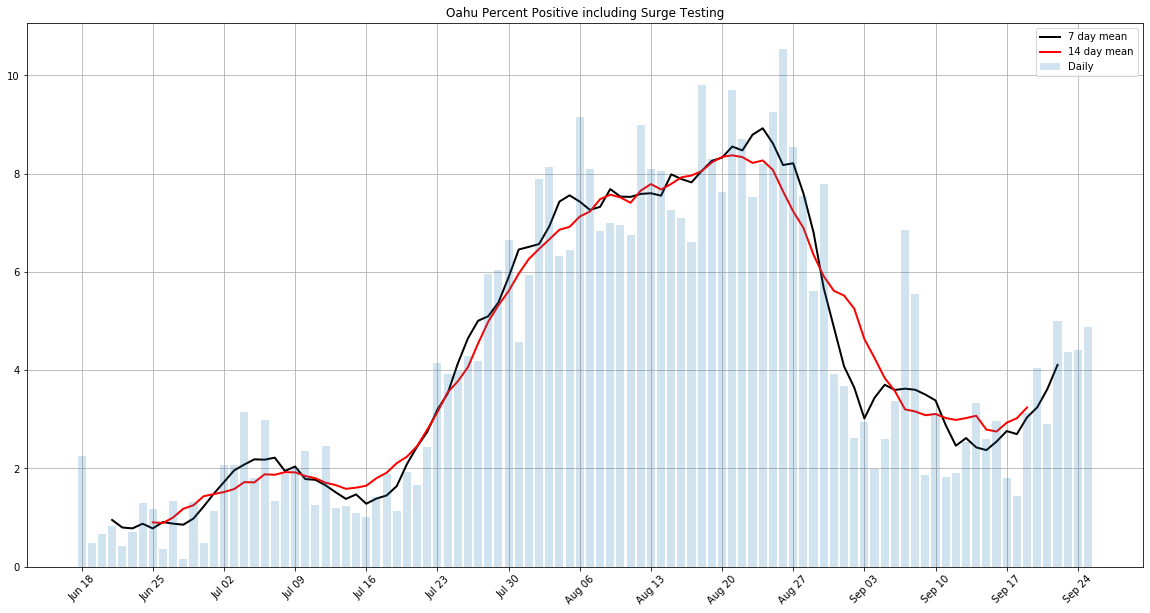

In [13]:
fig, ax = plt.subplots(figsize=(20,10))

ax.bar(dfData.index,dfData,zorder=10,label='Daily',alpha=0.2)
ax.plot(dfData.index,dfData.rolling(7,center=True).mean(),linewidth=2,color='black',label='7 day mean')
ax.plot(dfData.index,dfData.rolling(14,center=True).mean(),linewidth=2,color='red',label='14 day mean')

#set ticks every week
ax.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=mdates.TH))
#set major ticks format
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
#rotate x axis labels
plt.xticks(rotation=45)
#grid
ax.grid()
ax.legend()
plt.title('Oahu Percent Positive including Surge Testing');

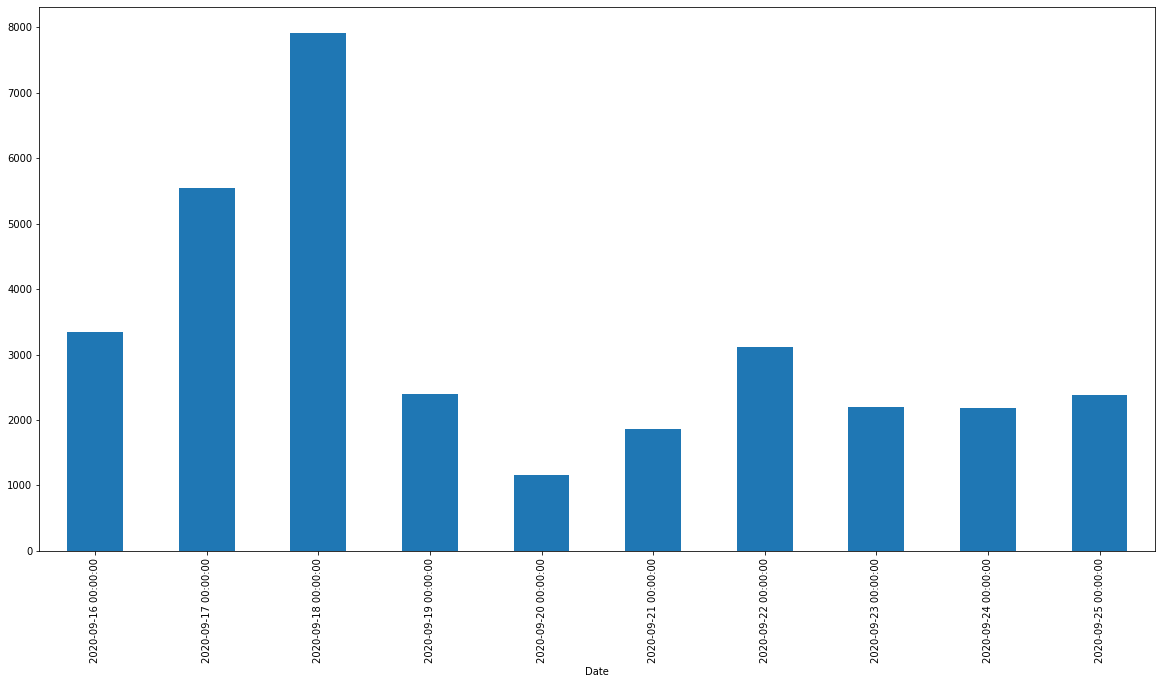

In [25]:
(df_hon['Positive Lab']+df_hon['Negative Lab']).tail(10).plot(kind='bar',figsize=(20,10))